## Import necessary libraries and the dataset

In [1]:
# import libraries
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
os.listdir("data")

['gender_submission.csv', 'test.csv', 'train.csv']

In [2]:
# Loading data
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

## Data Overview and Cleaning

In [3]:
# Sample train dataset
train_data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
809,810,1,1,"Chambers, Mrs. Norman Campbell (Bertha Griggs)",female,33.0,1,0,113806,53.1000,E8,S
111,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C
652,653,0,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8475,8.4333,NaN,S
776,777,0,3,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.7500,F38,Q
468,469,0,3,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q


In [4]:
# Sample test dataset
test_data.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
317,1209,2,"Rogers, Mr. Reginald Harry",male,19.0,0,0,28004,10.5000,NaN,S
292,1184,3,"Nasr, Mr. Mustafa",male,NaN,0,0,2652,7.2292,NaN,C
101,993,2,"Weisz, Mr. Leopold",male,27.0,1,0,228414,26.0000,NaN,S
257,1149,3,"Niklasson, Mr. Samuel",male,28.0,0,0,363611,8.0500,NaN,S


In [5]:
print('The shape of the train data is (%d, %d)' % train_data.shape)
print(train_data.info())
print('*'*40)
print('The shape of the test data is (%d, %d)' % test_data.shape)
print(test_data.info())

The shape of the train data is (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
****************************************
The shape of the test data is (418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp    

In [6]:
passengerId = test_data.PassengerId
# drop passengerId cause it is useless
# train_data.drop(['PassengerId'], axis=1, inplace=True)
# test_data.drop(['PassengerId'], axis=1, inplace=True)

In [7]:
# Missing values
def count_missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = round(total / len(df) * 100, 2)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [8]:
count_missing_percentage(train_data)

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [9]:
count_missing_percentage(test_data)

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Embarked,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


### Embarked feature

In [10]:
# Embarked feature
def count_percentage(df, feature):
    percent = pd.DataFrame(round(df.loc[:, feature].value_counts(dropna=False) / len(df) * 100, 2))
    total = pd.DataFrame(df.loc[:, feature].value_counts(dropna=False))
    percent.columns=['Percent']
    total.columns=['Total']
    return pd.concat([total, percent], axis=1)
    

In [11]:
count_percentage(train_data, 'Embarked')

,Total,Percent
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


In [12]:
train_data[train_data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [13]:
count_percentage(test_data, 'Embarked')

,Total,Percent
S,270,64.59
C,102,24.40
Q,46,11.00


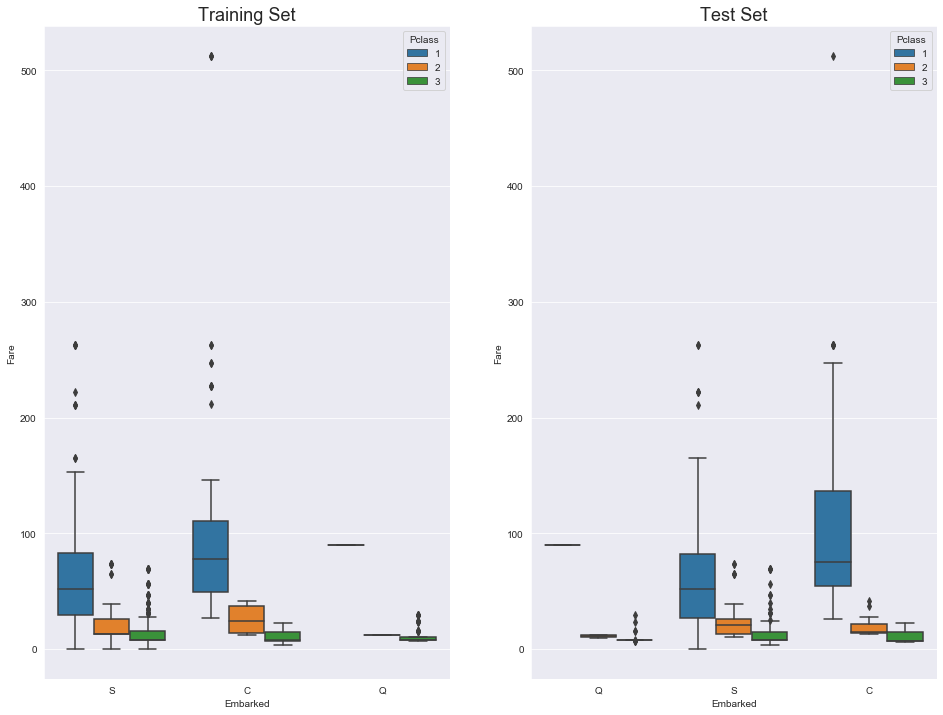

In [14]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16, 12), ncols=2)
ax1 = sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=train_data, ax=ax[0])
ax2 = sns.boxplot(x='Embarked', y='Fare', hue='Pclass', data=test_data, ax=ax[1])
ax1.set_title('Training Set', fontsize=18)
ax2.set_title('Test Set', fontsize=18)

# leg_1 = ax1.get_legend()
# leg_1.set_title('Pclass')
# legs = leg_1.texts
# legs[0].set_text('Upper')
# legs[1].set_text('Middle')
# legs[2].set_text('Lower')
fig.show()

In [15]:
train_data.Embarked.fillna('C', inplace=True)

### Cabin feature

In [16]:
print('Train Cabin missing: %s' % (train_data.Cabin.isnull().sum() / len(train_data.Cabin)))
print('Test Cabin missing: %s' % (test_data.Cabin.isnull().sum() / len(test_data.Cabin)))

Train Cabin missing: 0.7710437710437711
Test Cabin missing: 0.7822966507177034


In [17]:
# Concat train and test data into all_data
survivers = train_data.Survived

train_data.drop(['Survived'], axis=1, inplace=True)

all_data = pd.concat([train_data, test_data], ignore_index=False)

# Assign all Null to N
all_data.Cabin.fillna('N', inplace=True)

In [18]:
all_data.Cabin = [i[0] for i in all_data.Cabin]

In [19]:
count_percentage(all_data, 'Cabin')

,Total,Percent
N,1014,77.46
C,94,7.18
B,65,4.97
D,46,3.51
E,41,3.13
A,22,1.68
F,21,1.60
G,5,0.38
T,1,0.08


In [20]:
all_data.groupby('Cabin')['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [21]:
with_N = all_data[all_data['Cabin'] == 'N']

without_N = all_data[all_data['Cabin'] != 'N']

without_N.groupby('Cabin')['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [22]:
def Cabin_estimator(i):
    # Grouping Cabin by its first letter
    a = 0
    if i < 16:
        a = 'G'
    elif 16 <= i < 27:
        a = 'F'
    elif 27 <= i < 38:
        a = 'T'
    elif 38 <= i < 47:
        a = 'A'
    elif 47 <= i < 53:
        a = 'E'
    elif 53 <= i < 54:
        a = 'D'
    elif 54 <= i < 116:
        a = 'C'
    else:
        a = 'B'
    return a
        

In [23]:
# Apply Cabin estimator
with_N.loc[:,'Cabin'] = with_N.Fare.apply(lambda x: Cabin_estimator(x))

all_data = pd.concat([with_N, without_N], axis=0)

# Using passengerId to seperate test and train
all_data.sort_values(by='PassengerId', inplace=True)

train_data = all_data[:891]

test_data = all_data[891:]

train_data['Survived'] = survivers

In [24]:
# The missing value of Fare
test_data[test_data.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,B,S


In [25]:
missing_value = test_data[(test_data.Pclass == 3) & (test_data.Sex == 'male') & (test_data.Embarked == 'S')].Fare.mean()
# Replace the null value with the mean of the fare
test_data.Fare.fillna(missing_value, inplace=True)

### Age feature

In [26]:
# For age feature, we will use Random Forest Regression later
print('Train age missing percentage: %s' % (train_data.Age.isnull().sum() / len(train_data) * 100))
print('Test age missing percentage: %s' % (test_data.Age.isnull().sum() / len(test_data) * 100))

Train age missing percentage: 19.865319865319865
Test age missing percentage: 20.574162679425836


## Data Visualizations and Feature Relations

### Gender and Survived

Text(0, 0.5, '% of passengers survived')

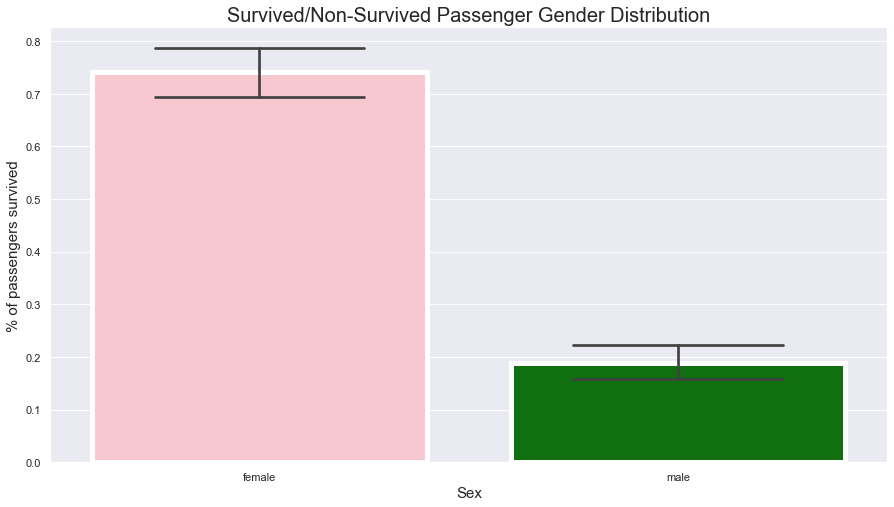

In [27]:
pal = {'male': 'green', 'female': 'pink'}
sns.set(style='darkgrid')
plt.subplots(figsize=(15, 8))
ax = sns.barplot(x='Sex',
                 y='Survived',
                 data=train_data,
                 palette=pal,
                 linewidth=5,
                 order=['female', 'male'],
                 capsize=0.5)

plt.title('Survived/Non-Survived Passenger Gender Distribution', fontsize=20)
plt.xlabel('Sex', fontsize=15)
plt.ylabel("% of passengers survived", fontsize=15)

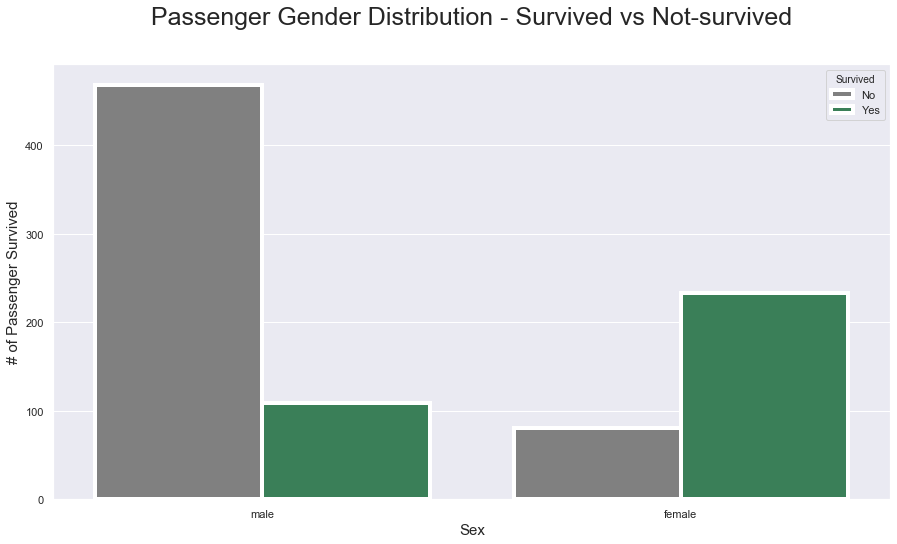

In [28]:
pal = {1: "seagreen", 0: "gray"}
sns.set(style='darkgrid')
plt.subplots(figsize=(15, 8))
ax = sns.countplot(x="Sex",
                   hue='Survived',
                   data=train_data,
                   linewidth=4,
                   palette=pal)

plt.title('Passenger Gender Distribution - Survived vs Not-survived', fontsize=25, pad=40)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('# of Passenger Survived', fontsize=15)

leg = ax.get_legend()
leg.set_title('Survived')
legs = leg.texts
legs[0].set_text("No")
legs[1].set_text("Yes")
plt.show()

#### Summary
---
- Female passengers survived more than male
- Seems that females and children were the priority

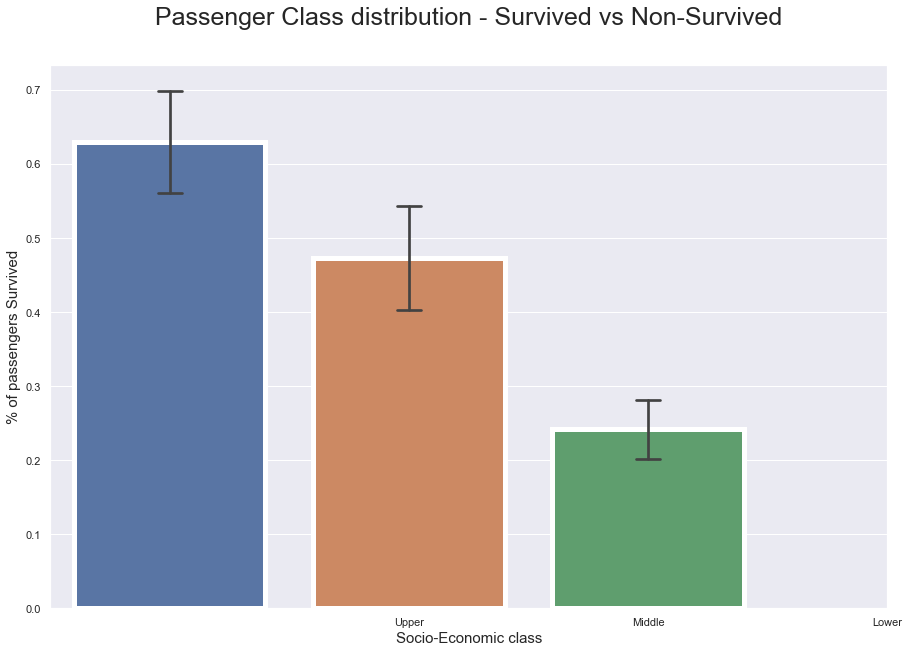

In [29]:
plt.subplots(figsize=(15, 10))
sns.barplot(x='Pclass',
            y='Survived',
            data=train_data,
            linewidth=5,
            capsize=.1)

plt.title("Passenger Class distribution - Survived vs Non-Survived", fontsize=25, pad=40)
plt.xlabel("Socio-Economic class", fontsize=15)
plt.ylabel("% of passengers Survived", fontsize=15)
labels = ['Upper', 'Middle', 'Lower']
val = sorted(train_data.Pclass.unique())
plt.xticks(val, labels)
plt.show()

* It looks like that
 - ~63% first class passengers survived
 - ~48% second class survived
 - ~24% third class survived
 

([<matplotlib.axis.XTick at 0x1f66868c308>,
 <a list of 3 Text xticklabel objects>)

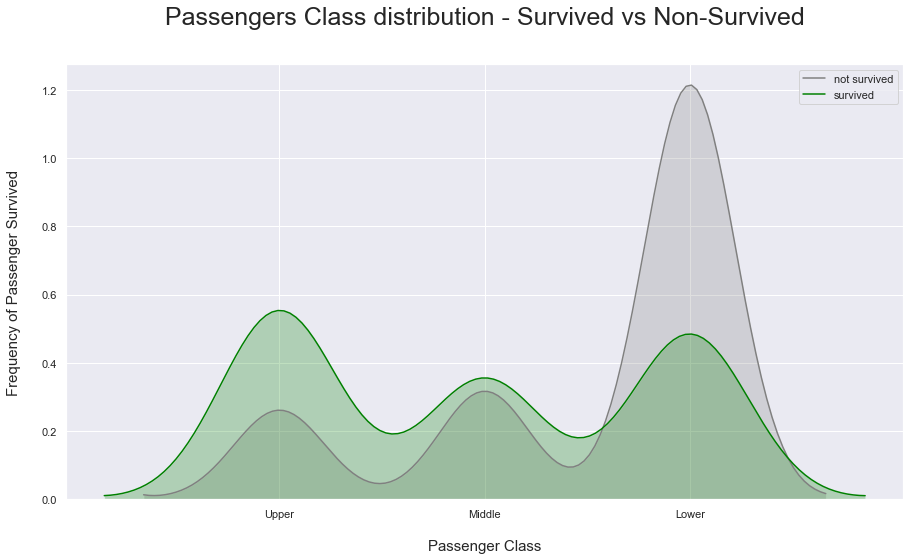

In [30]:
fig = plt.figure(figsize=(15, 8), )
ax = sns.kdeplot(train_data.Pclass[train_data.Survived == 0],
                 color='gray',
                 shade=True,
                 label='not survived')
ax = sns.kdeplot(train_data.Pclass[train_data.Survived == 1],
                 color='green',
                 shade='True',
                 label='survived')
plt.title("Passengers Class distribution - Survived vs Non-Survived", fontsize=25, pad=40)
plt.ylabel("Frequency of Passenger Survived", fontsize=15, labelpad=20)
plt.xlabel("Passenger Class", fontsize=15, labelpad=20)
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train_data.Pclass.unique()), labels)

### Fare and Survived

Text(0.5, 0, 'Fare')

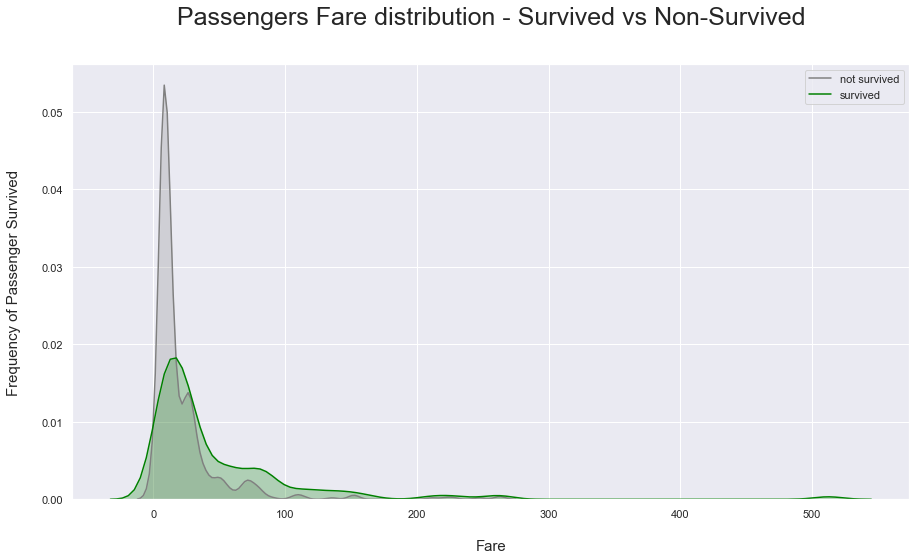

In [31]:
fig = plt.figure(figsize=(15, 8))
ax = sns.kdeplot(train_data.Fare[train_data.Survived == 0],
                 color='gray',
                 shade=True,
                 label='not survived')
ax = sns.kdeplot(train_data.Fare[train_data.Survived == 1],
                 color='green',
                 shade=True,
                 label='survived')
plt.title("Passengers Fare distribution - Survived vs Non-Survived", fontsize=25, pad=40)
plt.ylabel("Frequency of Passenger Survived", fontsize=15, labelpad=20)
plt.xlabel("Fare", fontsize=15, labelpad=20)

This plot shows something...
* Fare under 100 dollar represents that a lot of passengers who bought the ticket within that range didn't survive.
* When fare is approximately more than 280 dollar, there is no gray shade -> either everyone passed that fare point survived 
or maybe there is an outlier that clouds our judgement.

In [32]:
train_data[train_data.Fare > 280]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
258,259,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,B,C,1
679,680,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B,C,1
737,738,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B,C,1


As we have assumed, there is an outlier with a fare of $512

### Age and Survived
----

Text(0, 0.5, 'Frequency')

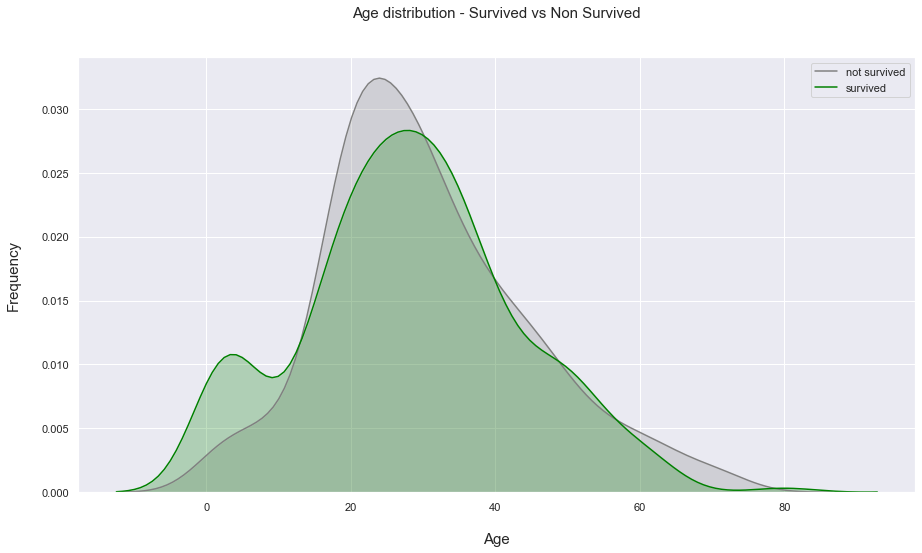

In [33]:
fig = plt.figure(figsize=(15, 8))
ax = sns.kdeplot(train_data.loc[(train_data['Survived'] == 0), 'Age'],
                 color='gray',
                 shade=True,
                 label='not survived')
ax = sns.kdeplot(train_data.loc[(train_data['Survived'] == 1), 'Age'],
                 color='green',
                 shade=True,
                 label='survived')
plt.title('Age distribution - Survived vs Non Survived', fontsize=15, pad=40)
plt.xlabel("Age", fontsize=15, labelpad=20)
plt.ylabel("Frequency", fontsize=15, labelpad=20)

### Combined Feature Relations
---

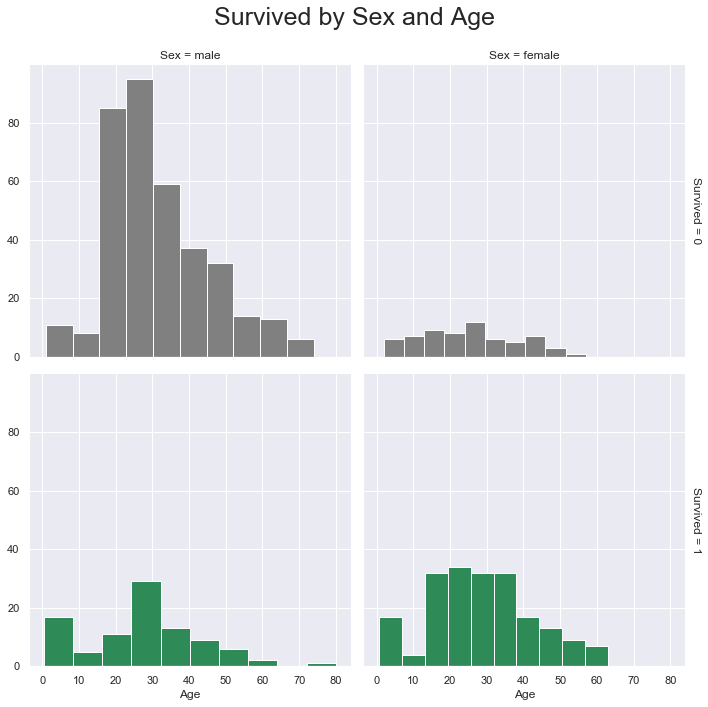

In [34]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(train_data, size=5, col="Sex", row="Survived", margin_titles=True, hue="Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor='white')
g.fig.suptitle("Survived by Sex and Age", size=25)
plt.subplots_adjust(top=0.9)

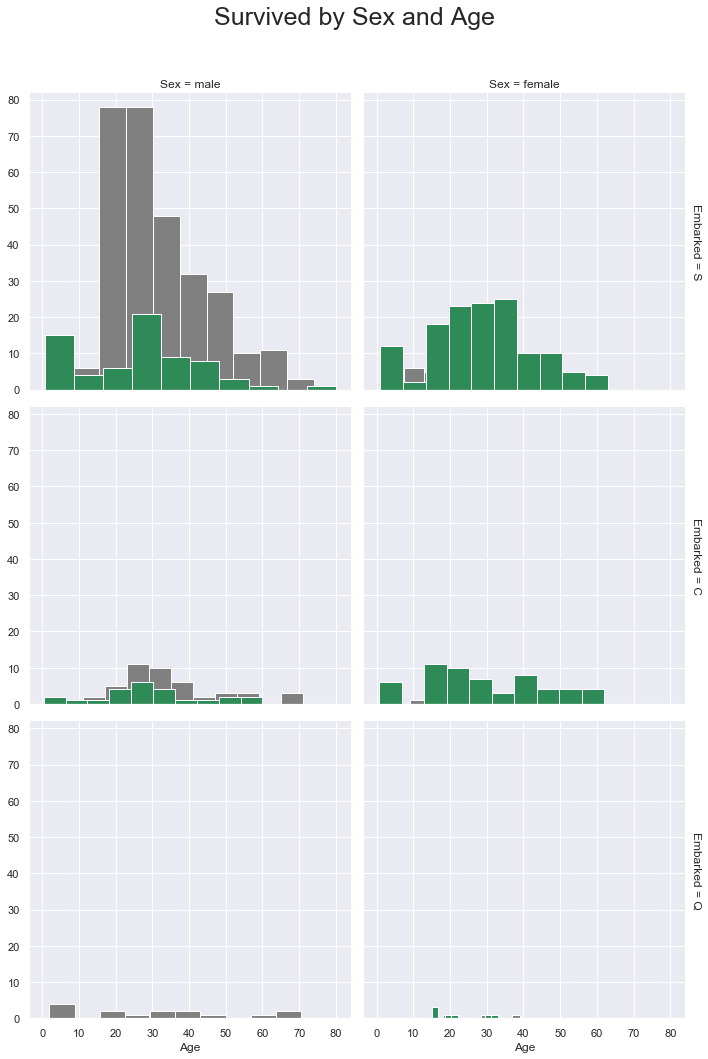

In [35]:
g = sns.FacetGrid(train_data, size=5, col="Sex", row="Embarked", margin_titles=True, hue="Survived",
                  palette=pal)
g = g.map(plt.hist, "Age", edgecolor='white')
g.fig.suptitle("Survived by Sex and Age", size=25)
plt.subplots_adjust(top=0.9)

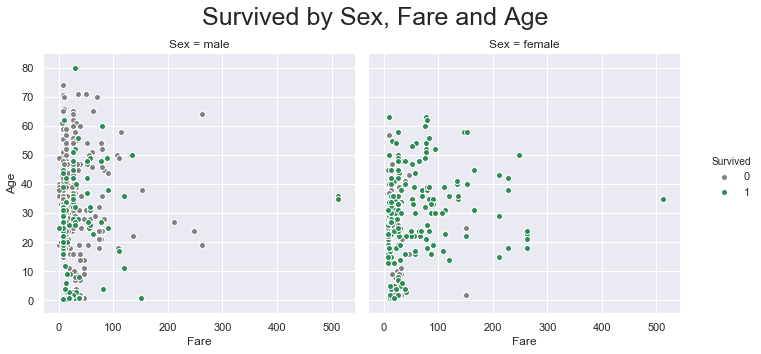

In [36]:
g = sns.FacetGrid(train_data, size=5, col='Sex', hue='Survived', margin_titles=True,
                  palette=pal)
g.map(plt.scatter, "Fare", "Age", edgecolor='w').add_legend()
g.fig.suptitle("Survived by Sex, Fare and Age", size=25)
plt.subplots_adjust(top=0.85)

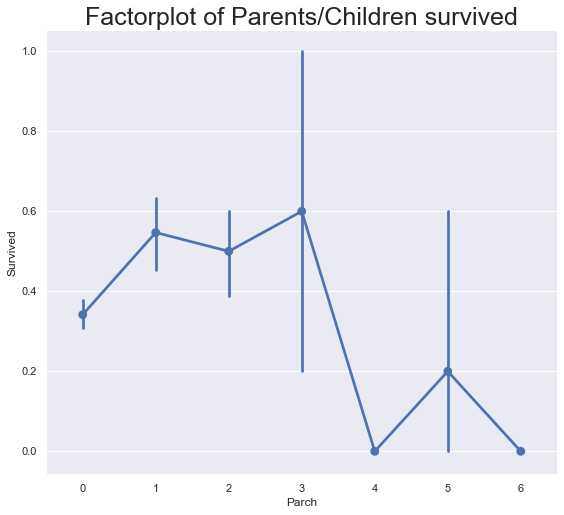

In [37]:
# dropping the three outliers where Fare is over $500
train_data = train_data[train_data.Fare < 500]
# factor plot
sns.factorplot(x='Parch', y='Survived', data=train_data, kind='point', size=8)
plt.title("Factorplot of Parents/Children survived", fontsize=25)
plt.subplots_adjust(top=0.85)

**Passengers who traveled win big groups with parents/children had less survival rate than other passengers**

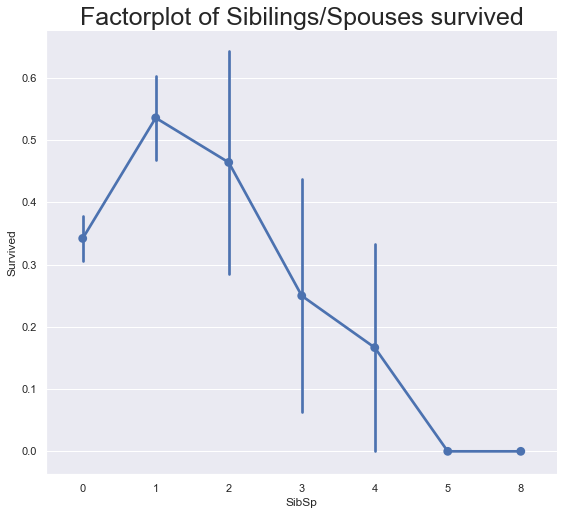

In [38]:
sns.factorplot(x='SibSp', y='Survived', data=train_data, kind='point', size=8)
plt.title("Factorplot of Sibilings/Spouses survived", fontsize=25)
plt.subplots_adjust(top=0.85)

**Passengers who traveled in small groups with siblings/spouses had better chances of survival

In [39]:
# Replacing female with 0 and male with 1 in "Sex" column
train_data['Sex'] = train_data.Sex.apply(lambda x: 0 if x == "female" else 1)
test_data['Sex'] = test_data.Sex.apply(lambda x: 0 if x == "female" else 1)

## Statistical Overview
---

In [40]:
train_data.describe()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
count,888.000000,888.000000,888.000000,711.000000,888.000000,888.000000,888.000000,888.000000
mean,445.618243,2.313063,0.647523,29.675345,0.524775,0.381757,30.582164,0.381757
std,257.405474,0.834007,0.478011,14.552495,1.104186,0.806949,41.176366,0.486091
min,1.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,2.000000,0.000000,20.000000,0.000000,0.000000,7.895800,0.000000
50%,445.500000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,667.250000,3.000000,1.000000,38.000000,1.000000,0.000000,30.771850,1.000000
max,891.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000,1.000000


In [41]:
train_data.describe(include = ['O'])

,Name,Ticket,Cabin,Embarked
count,888,888,888,888
unique,888,680,8,3
top,"O'Brien, Mr. Thomas",CA. 2343,G,S
freq,1,7,464,644


In [42]:
train_data[['Pclass', 'Survived']].groupby('Pclass').mean().reset_index()

,Pclass,Survived
0,1,0.624413
1,2,0.472826
2,3,0.242363


In [43]:
# Overview(Survived vs non survived)
survived_summary = train_data.groupby("Survived")
survived_summary.mean().reset_index()

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,447.016393,2.531876,0.852459,30.626179,0.553734,0.329690,22.117887
1,1,443.353982,1.958702,0.315634,28.270627,0.477876,0.466077,44.289799


In [44]:
survived_summary = train_data.groupby("Sex")
survived_summary.mean().reset_index()

,Sex,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,0,431.578275,2.162939,27.888462,0.696486,0.651757,42.985091,0.741214
1,1,453.260870,2.394783,30.705477,0.431304,0.234783,23.830658,0.186087


In [45]:
survived_summary = train_data.groupby("Pclass")
survived_summary.mean().reset_index()

,Pclass,PassengerId,Sex,Age,SibSp,Parch,Fare,Survived
0,1,460.225352,0.563380,38.280984,0.422535,0.356808,78.124061,0.624413
1,2,445.956522,0.586957,29.877630,0.402174,0.380435,20.662183,0.472826
2,3,439.154786,0.706721,25.140620,0.615071,0.393075,13.675550,0.242363


* This data has 888 row and 9 columns
* only 38% passengers survived
* 74% female survived while 19% male survived
* 62% first class passengers survived while only 24% lower class paseengers survived

### Correlation Matrix and Heatup
---
#### Correlations

In [46]:
pd.DataFrame(abs(train_data.corr()['Survived']).sort_values(ascending=False))

,Survived
Survived,1.000000
Sex,0.545899
Pclass,0.334068
Fare,0.261742
Parch,0.082157
Age,0.079472
SibSp,0.033395
PassengerId,0.006916


*Sex is the most important correlated feature with Survived(dependent variable) followed by Pclass*

In [47]:
# get the most important variables
corr = train_data.corr() ** 2
corr.Survived.sort_values(ascending=False)

Survived       1.000000
Sex            0.298006
Pclass         0.111601
Fare           0.068509
Parch          0.006750
Age            0.006316
SibSp          0.001115
PassengerId    0.000048
Name: Survived, dtype: float64

** Squaring the correlation feature note only gives on positive correlations but also simplifies the relationships.**

Text(0.5, 1.03, 'Correlations Among Features')

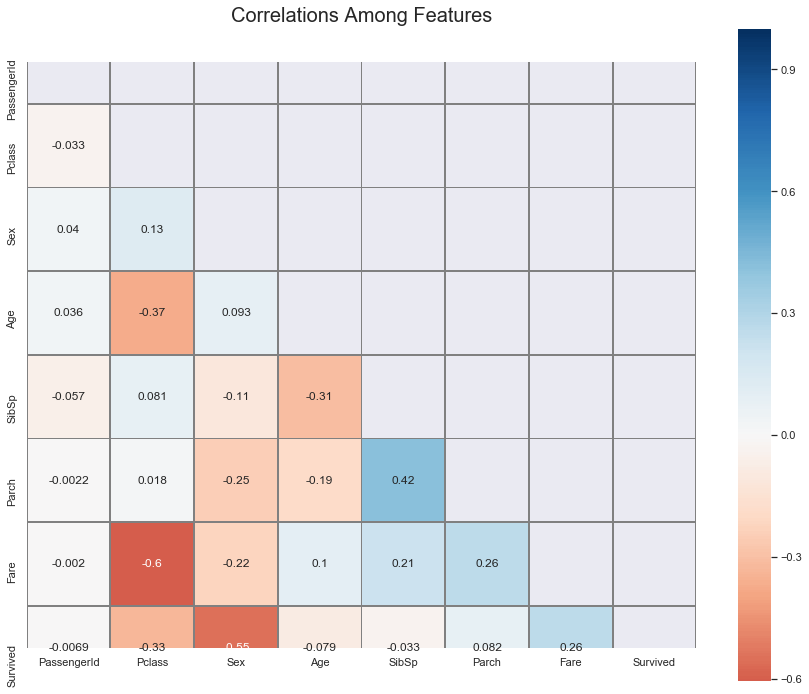

In [48]:
# heatmap to see the correlation between features
# generate a mask for the upper traiangle (taken from seaborn example gallery)
mask = np.zeros_like(train_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize=(15, 12))
sns.heatmap(train_data.corr(),
            annot=True,
            mask=mask,
            cmap='RdBu',
            linewidths=.9,
            linecolor='gray',
            fmt='.2g',
            center=0,
            square=True)
plt.title("Correlations Among Features", y=1.03, fontsize=20, pad=40)

**Positive Correlation Features:
* Fare and Survived: 0.26

** Negative Correlation Features:
* Fare and Pclass: -0.6
* Sex and Survived: -0.55
* Pclass and Survived: -0.33

### Statistical Test for Correlation
---
#### Hypothesis testing for Titanic

In [49]:
male_mean = train_data[train_data['Sex'] == 1].Survived.mean()
male_mean

0.18608695652173912

In [50]:
male_mean = train_data[train_data['Sex'] == 1].Survived.mean()

female_mean = train_data[train_data['Sex'] == 0].Survived.mean()
print("Male survival mean: %s" % male_mean)
print("Female survival mean: %s" % female_mean)
print('The mean difference between male and female survival rate: %s' % (male_mean-female_mean))

Male survival mean: 0.18608695652173912
Female survival mean: 0.7412140575079872
The mean difference between male and female survival rate: -0.5551271009862481


In [51]:
# Sperate male and female dataframe
male = train_data[train_data['Sex'] == 1]
female = train_data[train_data['Sex'] == 0]

# empty list for storing mean sample
m_mean_samples = []
f_mean_samples = []

for i in range(50):
    m_mean_samples.append(np.mean(random.sample(list(male['Survived']), 50, )))
    f_mean_samples.append(np.mean(random.sample(list(female['Survived']), 50, )))
    
# Print
print('Male mean sample mean: %s' % round(np.mean(m_mean_samples), 2))
print('Female mean sample mean: %s' % round(np.mean(f_mean_samples), 2))
print('Difference between male and female mean sample mean: %s' % round(np.mean(m_mean_samples) - np.mean(f_mean_samples), 2))


Male mean sample mean: 0.19
Female mean sample mean: 0.73
Difference between male and female mean sample mean: -0.54


In [52]:
import scipy.stats as stats

print(stats.ttest_ind(m_mean_samples, f_mean_samples))
print('This is the p-value when we break it into standard form: %s' % stats.ttest_ind(m_mean_samples, f_mean_samples).pvalue)

Ttest_indResult(statistic=-44.58484171558002, pvalue=6.935690560139657e-67)
This is the p-value when we break it into standard form: 6.935690560139657e-67


## Feature Engineering
---
### name_length
**Create a new feature "name_length" that will take the count of letters of each name**

In [53]:
# Creating a new column
train_data['name_length'] = [len(i) for i in train_data.Name]
test_data['name_length'] = [len(i) for i in test_data.Name]

def name_length_group(size):
    a = ''
    if size <= 20:
        a = 'short'
    elif size <= 35:
        a = 'medium'
    elif size <= 45:
        a = 'good'
    else:
        a = 'long'
    return a

train_data['nLength_group'] = train_data['name_length'].map(name_length_group)
test_data['nLength_group'] = test_data['name_length'].map(name_length_group)

# cuts the column by given bins based on the range of name_length
# group_names = ['short', 'medium', 'good', 'long']
# train_data['name_len_group'] = pd.cut(train_data['name_length'], bins=4, labels=group_names)

### title
**getting the title of each name as a new feature**

In [54]:
# get the title from the name
train_data['title'] = [i.split('.')[0] for i in train_data.Name]
train_data['title'] = [i.split(',')[1] for i in train_data.title]
test_data['title'] = [i.split('.')[0] for i in test_data.Name]
test_data['title'] = [i.split(',')[1] for i in test_data.title]

In [55]:
train_data['title'] = [i.replace('Ms', 'Miss') for i in train_data.title]
train_data['title'] = [i.replace('Mlle', 'Miss') for i in train_data.title]
train_data['title'] = [i.replace('Mme', 'Mrs') for i in train_data.title]
train_data['title'] = [i.replace('Dr', 'rare') for i in train_data.title]
train_data['title'] = [i.replace('Col', 'rare') for i in train_data.title]
train_data['title'] = [i.replace('Major', 'rare') for i in train_data.title]
train_data['title'] = [i.replace('Don', 'rare') for i in train_data.title]
train_data['title'] = [i.replace('Jonkheer', 'rare') for i in train_data.title]
train_data['title'] = [i.replace('Sir', 'rare') for i in train_data.title]
train_data['title'] = [i.replace('Lady', 'rare') for i in train_data.title]
train_data['title'] = [i.replace('Capt', 'rare') for i in train_data.title]
train_data['title'] = [i.replace('the Countess', 'rare') for i in train_data.title]
train_data['title'] = [i.replace('Rev', 'rare') for i in train_data.title]

test_data['title'] = [i.replace('Ms', 'Miss') for i in test_data.title]
test_data['title'] = [i.replace('Dr', 'rare') for i in test_data.title]
test_data['title'] = [i.replace('Col', 'rare') for i in test_data.title]
test_data['title'] = [i.replace('Dona', 'rare') for i in test_data.title]
test_data['title'] = [i.replace('Rev', 'rare') for i in test_data.title]


### family_size
**Creating a new feature named "family_size"**

In [56]:
train_data['family_size'] = train_data.SibSp + train_data.Parch + 1
test_data['family_size'] = test_data.SibSp + test_data.Parch + 1

In [57]:
def family_group(size):
    a = ''
    if size <= 1:
        a = 'loner'
    elif size <= 4:
        a = 'small'
    else:
        a = 'large'
    return a

In [58]:
train_data['family_group'] = train_data['family_size'].map(family_group)
test_data['family_group'] = test_data['family_size'].map(family_group)

### is_alone

In [59]:
train_data['is_alone'] = [1 if i<2 else 0 for i in train_data.family_size]
test_data['is_alone'] = [1 if i<2 else 0 for i in test_data.family_size]

### ticket

In [60]:
train_data.drop(['Ticket'], axis=1, inplace=True)
test_data.drop(['Ticket'], axis=1, inplace=True)

### calculated_fare
**Seems that the fair column kept a record of the total fare**

In [61]:
train_data['calculated_fare'] = train_data.Fare / train_data.family_size
test_data['calculated_fare'] = test_data.Fare / test_data.family_size

### fare_group

In [62]:
def fare_group(fare):
    a = ''
    if fare <= 4:
        a = 'very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = 'very_high'
    return a

train_data['fare_group'] = train_data['calculated_fare'].map(fare_group)
test_data['fare_group'] = test_data['calculated_fare'].map(fare_group)
 
# groups = ['very_low', 'mid', 'high', 'very_high']
# train_data['fare_group'] = pd.cut(train_data['calculated_fare'], bins=4, labels=groups)

### PassengerId

In [63]:
train_data.drop(['PassengerId'], axis=1, inplace=True)
test_data.drop(['PassengerId'], axis=1, inplace=True)

### Creating dummy variables

In [64]:
train_data = pd.get_dummies(train_data, columns=['title', 'Pclass', 'Cabin', 'Embarked', 'nLength_group', 'family_group', 'fare_group'])
test_data = pd.get_dummies(test_data, columns=['title', 'Pclass', 'Cabin', 'Embarked', 'nLength_group', 'family_group', 'fare_group'])
train_data.drop(['family_size', 'Name', 'Fare', 'name_length'], axis=1, inplace=True)
test_data.drop(['Name', 'family_size', 'Fare', 'name_length'], axis=1, inplace=True)

### age

In [65]:
train_data = pd.concat([train_data[['Survived', 'Age', 'Sex', 'SibSp', 'Parch']], train_data.loc[:, 'is_alone':]], axis=1)
test_data = pd.concat([test_data[['Age', 'Sex']], test_data.loc[:, 'SibSp':]], axis=1)

In [66]:
from sklearn.ensemble import RandomForestRegressor

def completing_age(df):
    age_df = df.loc[:, 'Age':]
    
    temp_train = age_df.loc[age_df.Age.notnull()]
    temp_test = age_df.loc[age_df.Age.isnull()]
    
    y = temp_train.Age.values
    x = temp_train.loc[:, 'Sex':]. values
    
    rfr = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
    rfr.fit(x, y)
    
    predicted_age = rfr.predict(temp_test.loc[:, 'Sex':])
    
    df.loc[df.Age.isnull(), 'Age'] = predicted_age
    
    return df

completing_age(train_data)
completing_age(test_data)

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,title_ Mrs,...,nLength_group_medium,nLength_group_short,family_group_large,family_group_loner,family_group_small,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high,fare_group_very_low
0,34.500000,1,0,0,1,7.829200,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
1,47.000000,0,1,0,0,3.500000,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
2,62.000000,1,0,0,1,9.687500,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0
3,27.000000,1,0,0,1,8.662500,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
4,22.000000,0,1,1,0,4.095833,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,23.216136,1,0,0,1,8.050000,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
414,39.000000,0,0,0,1,108.900000,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
415,38.500000,1,0,0,1,7.250000,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0
416,23.216136,1,0,0,1,8.050000,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0


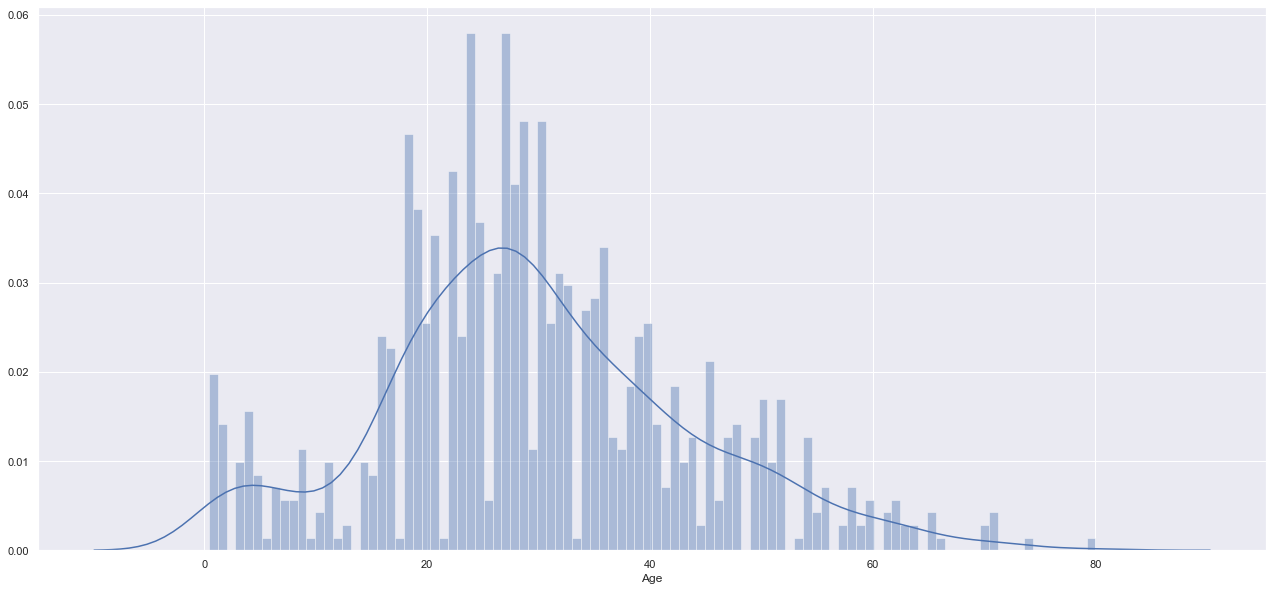

In [67]:
plt.subplots(figsize=(22, 10))
sns.distplot(train_data.Age, bins=100, kde=True, rug=False, norm_hist=False)

### age_group

In [68]:
def age_group_fun(age):
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4:
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a

train_data['age_group'] = train_data['Age'].map(age_group_fun)
test_data['age_group'] = test_data['Age'].map(age_group_fun)

train_data = pd.get_dummies(train_data, columns=['age_group'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['age_group'], drop_first=True)

## Pre-Modeling Tasks
### Separating dependent and independent variables

In [69]:
X = train_data.drop(['Survived'], axis=1)
y = train_data['Survived']

### Splitting the training data

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=0)

### Feature Scaling

In [71]:
train_data.sample(5)

,Survived,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,...,fare_group_mid,fare_group_very_high,fare_group_very_low,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
243,0,22.000000,1,0,0,1,7.12500,0,0,1,...,0,0,0,0,0,0,0,0,0,0
347,1,27.946859,0,1,0,0,8.05000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
771,0,48.000000,1,0,0,1,7.85420,0,0,1,...,0,0,0,0,0,1,0,0,0,0
564,0,24.986007,0,0,0,1,8.05000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
691,1,4.000000,0,0,1,0,6.70835,0,1,0,...,0,0,0,0,0,0,0,0,0,1


**Before Scaling**

In [72]:
headers = X_train.columns

X_train.head()

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,title_ Mrs,...,fare_group_mid,fare_group_very_high,fare_group_very_low,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
170,61.000000,1,0,0,1,33.5000,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
187,45.000000,1,0,0,1,26.5500,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
849,41.596667,0,1,0,0,44.5521,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
433,17.000000,1,0,0,1,7.1250,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
651,18.000000,0,0,1,0,11.5000,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


In [73]:
test_data.sample(5)

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,title_ Mrs,...,fare_group_mid,fare_group_very_high,fare_group_very_low,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
207,24.00,1,0,0,1,10.500000,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
100,43.00,0,1,0,0,27.720850,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
294,36.00,1,0,0,1,9.500000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
397,48.00,0,1,1,0,26.400000,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
281,0.75,1,1,1,0,4.591667,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [74]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train  = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

test_data = sc.transform(test_data)

**After Scaling**

In [75]:
pd.DataFrame(X_train, columns=headers).head()

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,title_ Master,title_ Miss,title_ Mr,title_ Mrs,...,fare_group_mid,fare_group_very_high,fare_group_very_low,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
0,2.254238,0.725942,-0.464750,-0.463616,0.794901,0.554725,-0.230633,-0.521487,0.837858,-0.383038,...,-0.455321,-0.30317,-0.186663,-0.246403,-0.116841,-0.306468,-0.101015,5.099020,-0.286299,-0.200699
1,1.114211,0.725942,-0.464750,-0.463616,0.794901,0.292298,-0.230633,-0.521487,0.837858,-0.383038,...,-0.455321,-0.30317,-0.186663,-0.246403,-0.116841,-0.306468,-0.101015,-0.196116,-0.286299,-0.200699
2,0.871718,-1.377520,0.356862,-0.463616,-1.258018,0.972044,-0.230633,-0.521487,-1.193520,2.610707,...,-0.455321,-0.30317,-0.186663,-0.246403,-0.116841,-0.306468,-0.101015,-0.196116,-0.286299,-0.200699
3,-0.880836,0.725942,-0.464750,-0.463616,0.794901,-0.441176,-0.230633,-0.521487,0.837858,-0.383038,...,-0.455321,-0.30317,-0.186663,-0.246403,-0.116841,-0.306468,-0.101015,-0.196116,3.492850,-0.200699
4,-0.809584,-1.377520,-0.464750,0.703282,-1.258018,-0.275979,-0.230633,1.917594,-1.193520,-0.383038,...,2.196253,-0.30317,-0.186663,-0.246403,-0.116841,-0.306468,-0.101015,-0.196116,3.492850,-0.200699


## Modeling the Data
---
### Logistic Regression

In [76]:
train_data.calculated_fare = train_data.calculated_fare.astype(float)

Text(0, 0.5, 'Survival Status')

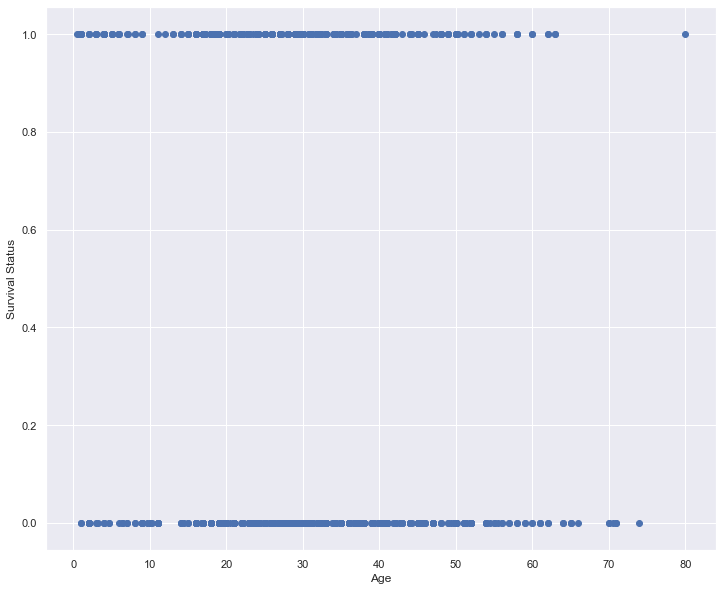

In [77]:
plt.subplots(figsize=(12, 10))
plt.scatter(train_data.Age, train_data.Survived)
plt.xlabel('Age')
plt.ylabel('Survival Status')

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

logreg = LogisticRegression(solver='liblinear')

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print('Accuracy score is: %s' % round(accuracy_score(y_pred, y_test), 4))

Accuracy score is: 0.8061


Confusion matrix, without normalization
[[150  27]
 [ 30  87]]
Confusion matrix, without normalization
[[150  27]
 [ 30  87]]


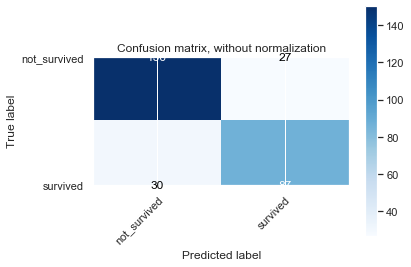

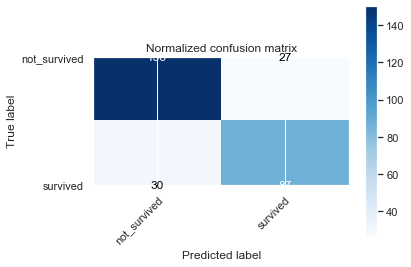

In [80]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
            
    cm = confusion_matrix(y_true, y_pred)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Nomalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right',
             rotation_mode='anchor')
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha='center', va='center',
                    color='white' if cm[i, j] > thresh else 'black')
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)
class_names = np.array(['not_survived', 'survived'])

plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Confusion matrix, without normalization')
plot_confusion_matrix(y_test, y_pred, classes=class_names, title='Normalized confusion matrix')

plt.show()